## Part 2 a) k-NN - UnderSampling

#### 1. load clean data

In [2]:
import sklearn as sk
import pandas as pd
import numpy as np

DATAFILE1 = 'D:\\Google One\\8. Library\\0. UTS\\Master of Information Technology\\4. Subjects\\2021 Semester 1\\32130 Fundamentals of Data Analystics\\4. Assignment\\Assignment 3\\Database\\A3_UnderSample_train.csv'
a3train = pd.read_csv(DATAFILE1)
a3train = a3train[[col for col in a3train.columns if (col != 'Unnamed: 0' and col != 'Quote_Id')]]
a3train.head()

,Field_info2,Field_info4,Coverage_info1,Coverage_info2,Sales_info1,Sales_info2,Sales_info3,Sales_info5,Personal_info1,Personal_info2,...,Property_3_Q,Property_3_R,Property_3_S,Geo_5_CA,Geo_5_IL,Geo_5_NJ,Geo_5_TX,Quote_Year,Quote_Month,Quote_Flag
0,1.042384,0,2.869871,0.161749,1,0.793684,1.430736,1.086410,0,0.757145,...,1,0,0,0,0,0,1,-1.070547,-0.589215,0
1,1.679706,0,-0.538132,0.161749,1,0.793684,-0.475199,-1.300374,0,1.500418,...,0,1,0,0,0,1,0,1.684170,1.777352,0
2,0.815541,0,-0.896869,0.161749,1,-1.252022,0.954253,-1.665920,0,-1.175365,...,0,1,0,0,0,1,0,0.306811,0.594068,0
3,0.831744,0,-0.538132,-3.910702,1,-2.274875,-1.745822,0.726704,0,-1.175365,...,0,0,0,0,0,0,1,-1.070547,-0.293394,0
4,0.053995,0,1.434923,0.161749,1,-1.252022,0.954253,1.554985,0,-0.432092,...,0,0,0,1,0,0,0,-1.070547,1.185710,0


#### 2. parameter optimization `GridSearchCV`

In [3]:
X_train, y_train = a3train.iloc[:,:-1], a3train.iloc[:,-1]

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

n_neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
weights = ['uniform', 'distance']
est_model = KNeighborsClassifier()
random_grid = {'n_neighbors': n_neighbors, 
                'weights': weights,
                }

cv_Gird = GridSearchCV(estimator = est_model, param_grid = random_grid, 
                       scoring = make_scorer(f1_score,pos_label=1), cv = 3, verbose = 2)
cv_Gird.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=   1.2s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   1.2s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   1.1s
[CV] END ....................n_neighbors=1, weights=distance; total time=   1.1s
[CV] END ....................n_neighbors=1, weights=distance; total time=   1.1s
[CV] END ....................n_neighbors=1, weights=distance; total time=   1.1s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   1.4s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   1.4s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   1.3s
[CV] END ....................n_neighbors=3, weights=distance; total time=   1.3s
[CV] END ....................n_neighbors=3, weights=distance; total time=   1.2s
[CV] END ....................n_neighbors=3, wei

[CV] END ...................n_neighbors=33, weights=distance; total time=   1.6s
[CV] END ....................n_neighbors=35, weights=uniform; total time=   1.6s
[CV] END ....................n_neighbors=35, weights=uniform; total time=   1.7s
[CV] END ....................n_neighbors=35, weights=uniform; total time=   1.7s
[CV] END ...................n_neighbors=35, weights=distance; total time=   1.4s
[CV] END ...................n_neighbors=35, weights=distance; total time=   1.4s
[CV] END ...................n_neighbors=35, weights=distance; total time=   1.5s
[CV] END ....................n_neighbors=37, weights=uniform; total time=   1.7s
[CV] END ....................n_neighbors=37, weights=uniform; total time=   1.5s
[CV] END ....................n_neighbors=37, weights=uniform; total time=   1.8s
[CV] END ...................n_neighbors=37, weights=distance; total time=   1.5s
[CV] END ...................n_neighbors=37, weights=distance; total time=   1.5s
[CV] END ...................

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(f1_score, pos_label=1), verbose=2)

In [5]:
print(cv_Gird.best_params_)
print(cv_Gird.best_score_)

{'n_neighbors': 19, 'weights': 'distance'}
0.7704854765415265


#### 3. build classifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 19, weights= 'distance')
clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=19, weights='distance')

#### 4. generate `f1-score` for evaluation

In [8]:
# import test set and fit in to classifier
DATAFILE2 = 'D:\\Google One\\8. Library\\0. UTS\\Master of Information Technology\\4. Subjects\\2021 Semester 1\\32130 Fundamentals of Data Analystics\\4. Assignment\\Assignment 3\\Database\\A3_UnderSample_test.csv'
a3test = pd.read_csv(DATAFILE2)
a3test = a3test[[col for col in a3test.columns if (col != 'Unnamed: 0' and col != 'Quote_Id')]]

X_test, y_test = a3test.iloc[:,:-1], a3test.iloc[:,-1]
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.95      0.71      0.81     12629
           1       0.40      0.83      0.54      3006

    accuracy                           0.73     15635
   macro avg       0.68      0.77      0.68     15635
weighted avg       0.84      0.73      0.76     15635

The F1-score for Quote_Flag = 1 is 0.5439
[[8971 3658]
 [ 517 2489]]


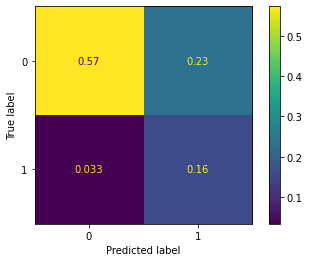

In [9]:
# generate reposrting score

from sklearn.metrics import f1_score, classification_report, confusion_matrix,plot_confusion_matrix
# Classification Report and f1-score
print(classification_report(y_test, y_pred))
print('The F1-score for Quote_Flag = 1 is {:.4f}'.format(f1_score(y_test, y_pred, pos_label=1)))
# Confusion Matrix
mat = confusion_matrix(y_test, y_pred)
print(mat)
plot_confusion_matrix(clf, X_test, y_test, normalize = 'all');


### AUC for kaggle
To save time, AUC performance needs to be checked before use to predict for kaggle.
Only AUC > 0.85 worth for kaggle

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
# auc
y_probs_class_1 = y_probs[:,1]
auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc))

The AUC is 0.842


In [29]:
# import the unknown data and fit in the classifier for prediction

DATAFILE3 = 'C:\\Users\\ASUS\\32130_FDA_a3\\Kaggle\\a3k-clean_m.csv'
a3kaggle = pd.read_csv(DATAFILE3)
a3kaggle1 = a3kaggle[[col for col in a3kaggle.columns if col != 'Unnamed: 0' and col != 'Quote_Id']]

y_pred_K = clf.predict(a3kaggle1)

In [30]:
dummy_list = []
for i in y_pred_K:
    dummy_list = np.append(dummy_list, i)

data = {
    'Quote_Id': a3kaggle['Quote_Id'],
    'Quote_Flag': dummy_list
    }
df = pd.DataFrame(data)

In [31]:
df.head()

,Quote_Id,Quote_Flag
0,1,0.0
1,4,0.0
2,5,0.0
3,7,0.0
4,8,0.0


In [32]:
df.to_csv('C:\\Users\\ASUS\\32130_FDA_a3\\Kaggle\\UTS_32130_10620084.csv')